# The Bias Variance Tradeoff

### Introduction

In the last lesson, we saw that in the training of our decision tree, our decision tree prefectly *predicted* the outcomes of data it saw in training, but did not make predictions on data it had not seen.  The reason is because our decision tree was essentially a different rule for each observation in the training set, but this complex logic did not tend to generalize to future data.

In this lesson, we'll see how we can alter our decision tree to make it more predictive of future data.

### Reviewing our Problem: Randomness

Let's revisit what was at the root of our problem.  

<img src="https://storage.cloud.google.com/curriculum-assets/intro-to-ml/leaf-nodes.png">

The reason why our decision tree did so well only on data it saw is because it was able to make a separate rule for each piece of data.  But these rules are unlikely to repeat themselves.  One way of stating this, is that our decision tree is finding a set of rules that happened to work, but really were just a coincidence.  

This is a problem with models that are highly responsive to our data.  They are able to respond to any slight movement in the data, and those movements may be unlikely to occur again because they are due to randomness.  For example, in our diabetes dataset, some of the diabetes progression is due to the factors above, but some progression just due to randomness.  We want our model to be flexible enough to discover how different features contribute to various outcomes, but not so flexible that it begins creating rules that are really just reflections of randomness in the data.  

### Making our Model Less Flexible

Ok, so we'd like to make our decision tree less flexible, and thus less susceptible to responding to the randomness in the data.  We can do this by restricting the number of levels in our decision tree.  Let's see this.  First, let's load up the data.

In [4]:
from sklearn.datasets import load_diabetes
import pandas as pd
dataset = load_diabetes()

y = pd.Series(dataset['target'])
X = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])

X_train = X[:-88]
y_train = y[:-88]

X_test = X[-88:]
y_test = y[-88:]

Now, here's a decision tree with only two levels.

In [4]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 2)
model.fit(X_train, y_train)

<img src="https://storage.cloud.google.com/curriculum-assets/intro-to-ml/tree-two-levels.png" width="70%">

Let's walk through what happened here.  By initializing our model with the line `model = DecisionTreeRegressor(max_depth = 2)`, we prevented our decision tree from making any further splits after two levels.  So our decision tree moves through the two levels in the same way, by finding the features that most separate observations with different target values.  But then after two levels, it stops making cuts, and simply predicts the average of the training data outcomes at each leaf node.  

So for the leaf node to the far left, there are 212 observations in the training data that fall into that leaf node, and the prediction for any future data that falls to that leaf node is the average of those observations, 104.30.

> But don't take my word for it.

In [11]:
model.predict(X_test[:10])

array([191.01052632, 104.3372093 , 104.3372093 , 191.01052632,
       104.3372093 , 104.3372093 , 168.86206897, 104.3372093 ,
       168.86206897, 191.01052632])

What we can see from the predictions above is that there are only four different values that is predicted by our decision tree.  Such a decision tree is way less flexible than the one we saw in the previous lesson, but because it is less complex, and because it is making each predictions based on more than just one observation, the logic of trained model is more likely to generalize to future observations.

In fact let's take a look.  Notice that this model -- with only two levels --  tends to do ok even on data that it has not seen.

In [13]:
model.score(X_test, y_test)

0.33686447929652885

But is this model as good as we can do?  Perhaps we could do better if we allowed more levels to our decision tree than just two.

### The bias variance tradeoff

The balance that we are trying to strike is called the bias-variance tradeoff.  By restricting our model to only two levels, we are limiting the complexity of our model, and thus preventing the model from finding more complex logic that perhaps *really is* having an impact on our real world data.  But the reason why we are doing this is to prevent the model from being so flexible that it also responds to randomness and thus makes predictions that will not apply to future data.

The *number of levels* is an example of a hyperparameter.  What's a hyperparameter?

> A hyperparameter is a parameter whose value is set *before* our model begins training. By contrast, our other parameters are derived through training [Wikipedia](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)).

We *tune* our hyperparameter simply by trying a series of different values and seeing what performs the the best on data it has not yet seen, the test set.

### Tuning our hyperparameter

Here, let's try a number of different levels and see what hyperparameter is best.  We'll train fifty different models, setting `max_levels` from 1 to 50, and see how well each model performs on the test set. 

In [16]:
max_levels = list(range(1, 50))
levels = []
scores = []
for level in max_levels:
    model = DecisionTreeRegressor(max_depth = level)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    levels.append(level)
    scores.append(score)

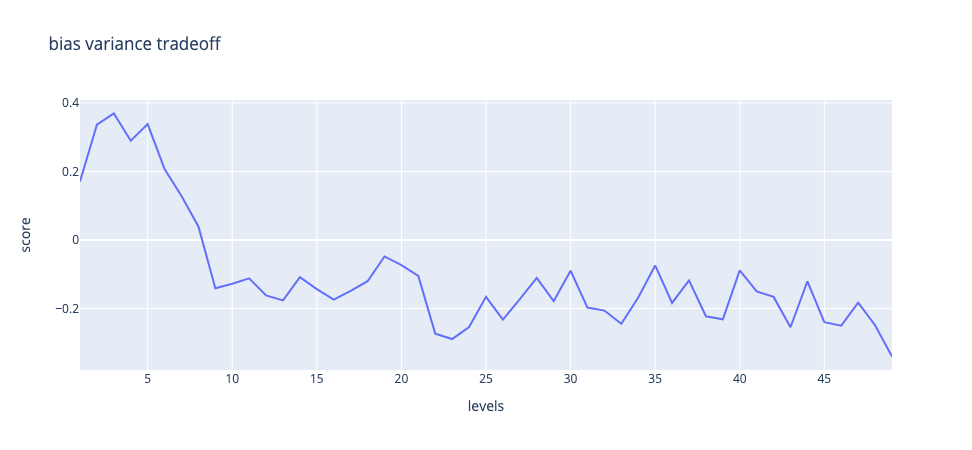

In [22]:
import plotly.graph_objects as go
scatter = go.Scatter(x = levels, y = scores)
layout = go.Layout(title = 'bias variance tradeoff', xaxis=dict(title = 'levels'), yaxis=dict(title = 'score'))
go.Figure(data = [scatter], layout = layout)

This typical of the type of graph we might see in tuning a hyperparameter.  Starting from the left of our graph, we see that our model initially improves as we add more levels from zero to say 2 or 3.  This is because we are allowing our model to becoming more complex, and thus more responsive to our data.  

But eventually our model becomes too variant, and performance suffers.  That is, the model's responsiveness to the randomness in the data outweighs the benefits of flexibility.  In our chart above, we see that our best performing hyperparameter is right around `max_levels = 3`, which has a score of .369 on our test set.  So we will train our final model with the following:

In [5]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.3692247585517009

### Summary

In this lesson, we saw that decision trees are a highly flexible model.  This flexibility has benefits because it allows a decision tree to respond to the underlying pattern in the data that is associated with an outcome.  However, when our decision trees are too flexible, they also become responsive to randomness in the training set, which does not repeat itself with future data, and thus reduces the model's predictiveness of future data.  

We are able to balance the bias variance tradeoff by tuning our hyperparameter.  We tune our hyperparameter by iteratively modeling different versions of our decision tree and choosing model that scores highest on the data in the test set. 